<a href="https://colab.research.google.com/github/tokoyamy/analise-de-sentimento/blob/main/Modelo_de_Classifica%C3%A7%C3%A3o_de_Textos_com_spaCy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de textos com spaCy

# Etapa 1: Importação e instalação das bibliotecas

In [ ]:
!pip install seaborn==0.10.0

In [ ]:
import spacy
spacy.__version__

In [ ]:
# Temporário por problemas no Colab
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!python -m spacy download pt

In [ ]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Etapa 2: Carregamento da base de dados

In [ ]:
base_dados = pd.read_csv('/content/base_treinamento.txt', encoding = 'utf-8')

In [ ]:
base_dados.shape

(196, 2)

In [ ]:
base_dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [ ]:
base_dados.tail()

,texto,emocao
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo
195,isso me apavora,medo


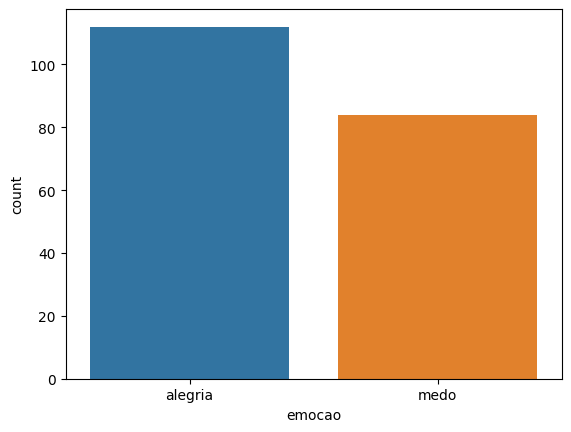

In [ ]:
sns.countplot(base_dados['emocao'], label = 'Contagem');

# Etapa 3: Função para pré-processamento dos textos

In [ ]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [ ]:
print(stop_words)

{'somente', 'vai', 'povo', 'quinze', 'saber', 'vindo', 'aquele', 'dizer', 'tentaram', 'de', 'três', 'essas', 'devem', 'na', 'faço', 'estiveste', 'aquilo', 'esta', 'teu', 'fora', 'meses', 'muito', 'daquela', 'vêm', 'qualquer', 'nesta', 'muitos', 'cá', 'eventual', 'essa', 'usa', 'menor', 'ligado', 'sobre', 'esse', 'porquê', 'és', 'puderam', 'maiorias', 'minha', 'relação', 'falta', 'nada', 'comprido', 'daquele', 'poderá', 'irá', 'qual', 'forma', 'elas', 'ver', 'iniciar', 'um', 'atrás', 'da', 'quanto', 'nem', 'posso', 'vem', 'numa', 'segundo', 'tem', 'então', 'ponto', 'minhas', 'tudo', 'do', 'sétimo', 'sexta', 'deve', 'mesmo', 'ter', 'tenho', 'ser', 'e', 'isto', 'estão', 'tiveste', 'mal', 'quando', 'partir', 'quatro', 'quê', 'ao', 'como', 'isso', 'outras', 'depois', 'vossos', 'meu', 'conhecida', 'deste', 'seis', 'ainda', 'neste', 'este', 'menos', 'ora', 'grandes', 'dezoito', 'oito', 'dos', 'cuja', 'terceiro', 'para', 'tais', 'sistema', 'apontar', 'lugar', 'dois', 'baixo', 'dezasseis', 'nun

In [ ]:
len(stop_words)

416

In [ ]:
#pln = spacy.load('pt')
pln = spacy.load("pt_core_news_sm")

In [ ]:
pln

In [ ]:
def preprocessamento(texto):
  texto = texto.lower()
  documento = pln(texto)

  lista = []
  for token in documento:
    #lista.append(token.text)
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [ ]:
teste = preprocessamento('Estou aPrendendo 1 10 23 processamento de linguagem natural, Curso em Curitiba')
teste

'aprender processamento linguagem natural curso curitiba'

# Etapa 4: Pré-processamento da base de dados

### Limpeza dos textos

In [ ]:
base_dados.head(10)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [ ]:
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)

In [ ]:
base_dados.head(10)

,texto,emocao
0,trabalho agradável,alegria
1,gosto ficar em o aconchego,alegria
2,fiz adesão a o curso hoje,alegria
3,admirar,alegria
4,adorar,alegria
5,adorar cabelo macio,alegria
6,adorar cor de o olho,alegria
7,somo amável outro,alegria
8,sinto afeição,alegria
9,querer agradar filho,alegria


### Tratamento da classe

In [ ]:
exemplo_base_dados = [["este trabalho é agradável", {"ALEGRIA": True, "MEDO": False}],
                      ["este lugar continua assustador", {"ALEGRIA": False, "MEDO": True}]]

In [ ]:
type(exemplo_base_dados)

list

In [ ]:
exemplo_base_dados[0]

['este trabalho é agradável', {'ALEGRIA': True, 'MEDO': False}]

In [ ]:
exemplo_base_dados[0][0]

'este trabalho é agradável'

In [ ]:
exemplo_base_dados[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [ ]:
type(exemplo_base_dados[0][1])

dict

In [ ]:
base_dados_final = []
for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
  #print(texto, emocao)
  if emocao == 'alegria':
    dic = ({'ALEGRIA': True, 'MEDO': False})
  elif emocao == 'medo':
    dic = ({'ALEGRIA': False, 'MEDO': True})

  base_dados_final.append([texto, dic.copy()])

In [ ]:
len(base_dados_final)

196

In [ ]:
base_dados_final[0]

['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}]

In [ ]:
base_dados_final[0][0]

'trabalho agradável'

In [ ]:
base_dados_final[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [ ]:
type(base_dados_final[0][1])

dict

In [ ]:
base_dados_final

[['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gosto ficar em o aconchego', {'ALEGRIA': True, 'MEDO': False}],
 ['fiz adesão a o curso hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelo macio', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cor de o olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somo amável outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amo', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixoneir', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sintar hoje', {'ALEGRIA': Tr

# Etapa 5: Criação do classificador

In [ ]:
from spacy.training import Example

In [ ]:
modelo = spacy.blank('pt')
textcat = modelo.add_pipe("textcat")
textcat.add_label("ALEGRIA")
textcat.add_label("MEDO")
historico = []

In [ ]:
modelo.begin_training()
for epoca in range(1000):
  random.shuffle(base_dados_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_final, 30):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(
            textos, annotations
        )]
    modelo.update(examples, losses=losses)
  if epoca % 100 == 0:
    print(losses)
    historico.append(losses)

{'textcat': 1.7140571177005768}
{'textcat': 3.780877195526389e-11}
{'textcat': 3.8416779252117145e-12}
{'textcat': 9.826637930015342e-13}
{'textcat': 3.516130495215177e-13}
{'textcat': 1.3395584148217024e-13}
{'textcat': 6.55975060647471e-14}
{'textcat': 3.4975037536611104e-14}
{'textcat': 1.714510506410329e-14}
{'textcat': 8.410327405564962e-15}


In [ ]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [ ]:
historico_loss = np.array(historico_loss)
historico_loss

array([1.71405712e+00, 3.78087720e-11, 3.84167793e-12, 9.82663793e-13,
       3.51613050e-13, 1.33955841e-13, 6.55975061e-14, 3.49750375e-14,
       1.71451051e-14, 8.41032741e-15])

Text(0, 0.5, 'Erro')

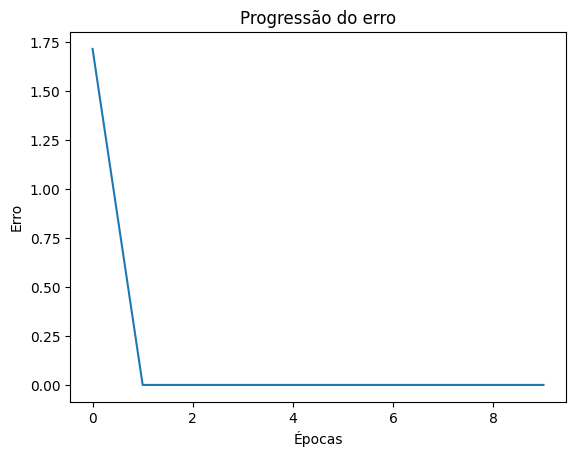

In [ ]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

In [ ]:
modelo.to_disk("modelo")

# Etapa 6: Testes com uma frase

In [ ]:
modelo_carregado = spacy.load("modelo")
modelo_carregado

In [ ]:
texto_positivo = 'eu adoro cor dos seus olhos'

In [ ]:
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'adorar cor de o olho'

In [ ]:
previsao = modelo_carregado(texto_positivo)
previsao

adorar cor de o olho

In [ ]:
previsao.cats

{'ALEGRIA': 1.0, 'MEDO': 2.8941526508674542e-08}

In [ ]:
texto_negativo = 'estou com medo dele'
previsao = modelo_carregado(preprocessamento(texto_negativo))
previsao.cats

{'ALEGRIA': 6.939003327488535e-08, 'MEDO': 0.9999998807907104}

# Etapa 7: Avaliação do modelo

## Avaliação na base de treinamento


In [ ]:
previsoes = []
for texto in base_dados['texto']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes

[{'ALEGRIA': 1.0, 'MEDO': 5.421556981133335e-09},
 {'ALEGRIA': 1.0, 'MEDO': 4.748789450559343e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.239872820553046e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.584873032811629e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.169840307431059e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.108402969407507e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.8941526508674542e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.9631923581519004e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.3365557549605e-08},
 {'ALEGRIA': 1.0, 'MEDO': 3.716768404160575e-08},
 {'ALEGRIA': 1.0, 'MEDO': 6.833441812403862e-09},
 {'ALEGRIA': 1.0, 'MEDO': 2.331917592357513e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.7940596503128745e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.2214452560499467e-08},
 {'ALEGRIA': 1.0, 'MEDO': 5.0063160728086586e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.1944810413287996e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.0412403383952551e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.1441590785921107e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.550207251455049e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.1742805838821369

In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [ ]:
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [ ]:
respostas_reais = base_dados['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

1.0

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[112,   0],
       [  0,  84]])

## Avaliação na base de teste

In [ ]:
base_dados_teste = pd.read_csv('/content/base_teste.txt', encoding = 'utf-8')

In [ ]:
base_dados_teste.head()

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


In [ ]:
base_dados_teste['texto'] = base_dados_teste['texto'].apply(preprocessamento)

In [ ]:
base_dados_teste.head()

,texto,emocao
0,precisar pagar ingresso,alegria
1,ajeitar ficar,alegria
2,fortuna ultrapassar,alegria
3,afortunar,alegria
4,benéfico medida,alegria


In [ ]:
previsoes = []
for texto in base_dados_teste['texto']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [ ]:
respostas_reais = base_dados_teste['emocao'].values

In [ ]:
accuracy_score(respostas_reais, previsoes_final)

0.5476190476190477

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[31, 17],
       [21, 15]])